In [6]:
#Counteor for the number of errors in the grid
import os
from os.path import join
path = os.getcwd()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydoc import ispath
import pandas as pd
import h5py
import numpy as np

parent = os.path.realpath(
        os.path.join(
            os.getcwd(),
            os.pardir,
            os.pardir,))
DBS = join(parent,"results","databases")
parent

'C:\\Users\\fpenaherrera_vaca\\Software\\Repos\\grid-capacity-for-electric-mobility'

In [7]:

# Change this accordingly
RESULTS_DIR = "C:\\Users\\fpenaherrera_vaca\\Documents\\OFFIS-nextCloud\\FBE-P_ZLE_EXT\\TP1\\AP1.3\\Durchstichszenarien\\DSZ2 - EMOB\\Model_Results\\31_days"
# RESULTS_DIR = "C:\\Repos\\31_days"
RESULTS_DB_DIR = join(RESULTS_DIR, "databases")
GRID_SNAPS_DIR = join(RESULTS_DIR, "grid_snapshots")
RESULTS_POSTPROC_DIR = join(RESULTS_DIR, "postprocessed")
scenarios = ["EV", "EV_PV", "EV_PV_STO", "GRID_OBSV"]


In [8]:
import json
CONFIGS = ["max_p","night_charging","prognosis", "solar_charging"]
min_v_df_results = []
for CONFIG in CONFIGS:
    with open(f"figs\\car_results_min_v_{CONFIG}.json") as json_file:
        min_v_dict = json.load(json_file)

    min_v_df = pd.DataFrame.from_dict(min_v_dict)
    min_v_df.set_index("n_cars", inplace=True)
    for x,y in zip([301,308,315,322],[245,260,275,280]):
        min_v_df.at[x, "GRID_OBSV"]=min_v_df.at[y, "GRID_OBSV"]
        min_v_df.at[y, "GRID_OBSV"]= np.nan
    min_v_df.columns = [x + "_"+CONFIG for x in min_v_df.columns]
    min_v_df_results.append(min_v_df)

min_res =  pd.concat(min_v_df_results, axis=1)
min_res

EV_max_p  EV_PV_max_p  EV_PV_STO_max_p  GRID_OBSV_max_p  \
n_cars                                                            
245     0.920297     0.921010         0.922504              NaN   
260     0.906064     0.906064         0.907611              NaN   
275     0.904203     0.904203         0.905757              NaN   
280     0.903718     0.903718         0.905273              NaN   
301          NaN          NaN              NaN         0.901980   
308          NaN          NaN              NaN         0.896946   
315          NaN          NaN              NaN         0.896551   
322          NaN          NaN              NaN         0.896551   

        EV_night_charging  EV_PV_night_charging  EV_PV_STO_night_charging  \
n_cars                                                                      
245              0.924221              0.924221                  0.930738   
260              0.915078              0.915078                  0.916590   
275              0.913617              0.913617                  0.915135   
280              0.913493              0.913493                  0.915011   
301                   NaN                   NaN                       NaN   
308                   NaN                   NaN                       NaN   
315                   NaN                   NaN                       NaN   
322                   NaN                   NaN                       NaN   

        GRID_OBSV_night_charging  EV_prognosis  EV_PV_prognosis  \
n_cars                                                            
245                          NaN      0.946454         0.948318   
260                          NaN      0.941649         0.946705   
275                          NaN      0.940793         0.945980   
280                          NaN      0.940793         0.945934   
301                     0.922063           NaN              NaN   
308                     0.920493           NaN              NaN   
315                     0.920154           NaN              NaN   
322                     0.920154           NaN              NaN   

        EV_PV_STO_prognosis  GRID_OBSV_prognosis  EV_solar_charging  \
n_cars                                                                
245                0.954916                  NaN           0.965142   
260                0.950178                  NaN           0.965142   
275                0.949361                  NaN           0.964626   
280                0.949361                  NaN           0.964092   
301                     NaN             0.950008                NaN   
308                     NaN             0.950046                NaN   
315                     NaN             0.950181                NaN   
322                     NaN             0.950035                NaN   

        EV_PV_solar_charging  EV_PV_STO_solar_charging  \
n_cars                                                   
245                 0.965142                  0.976626   
260                 0.965142                  0.976626   
275                 0.964626                  0.976626   
280                 0.964092                  0.976626   
301                      NaN                       NaN   
308                      NaN                       NaN   
315                      NaN                       NaN   
322                      NaN                       NaN   

        GRID_OBSV_solar_charging  
n_cars                            
245                          NaN  
260                          NaN  
275                          NaN  
280                          NaN  
301                     0.977029  
308                     0.977029  
315                     0.977029  
322                     0.977029

In [9]:
sns.set(font = "Times New Roman", style ="whitegrid")

fig,ax = plt.subplots()

pallette = ["r","r","r","r","b","b","b","b","g","g","g","g","c","c","c","c" ]

for i in range(0,4):
    graph=sns.lineplot(data=min_v_df_results[i],ax=ax, palette=pallette[4*i:4*i+4])
    ax.set_xlabel("Number of Cars")
    ax.set_ylabel("Minimum Voltage Per Unit [1]")
    ax.set_title("Minimum Voltage Levels for Different\nScenarios and Charging Strategies",fontweight="bold")
    graph.set_xticks([49*x for x in range(4,8)])

graph.axhline(0.95, label = "0.95 Limit",color='k',ls='--',linewidth=1)
graph.axhline(0.90, label = "0.90 Limit",color='k',linewidth=1)
ax.annotate("0.95 Limit", xy=(392, 0.951), size=10)
ax.annotate("0.90 Limit", xy=(392, 0.901), size=10)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
fig.savefig("figs\\min_voltage_smart_charging.png", dpi= 600)

['EV_PV_STO_max_p', 'GRID_OBSV_max_p']
['EV_PV_STO_night_charging', 'GRID_OBSV_night_charging']
['EV_PV_STO_prognosis', 'GRID_OBSV_prognosis']
['EV_PV_STO_solar_charging', 'GRID_OBSV_solar_charging']


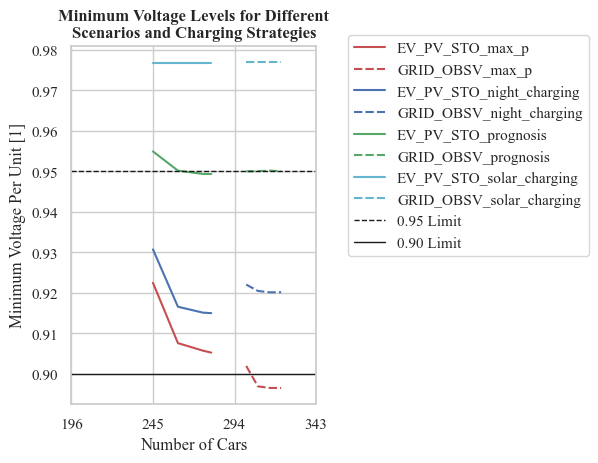

In [10]:
sns.set(font = "Times New Roman", style ="whitegrid")

fig,ax = plt.subplots()

pallette = ["r","r","r","r","b","b","b","b","g","g","g","g","c","c","c","c" ]
CONFIGS = ["max_p","night_charging","prognosis", "solar_charging"]

for i in range(0,4):
    cols = [x for x in min_v_df_results[i].columns]
    cols = [x for x in cols  if "EV_PV_STO" in x or "GRID_OBSV" in x]
    print(cols)
    graph=sns.lineplot(data=min_v_df_results[i][cols],ax=ax, palette=pallette[4*i:4*i+2])
    ax.set_xlabel("Number of Cars")
    ax.set_ylabel("Minimum Voltage Per Unit [1]")
    ax.set_title("Minimum Voltage Levels for Different\nScenarios and Charging Strategies",fontweight="bold")
    graph.set_xticks([49*x for x in range(4,8)])

graph.axhline(0.95, label = "0.95 Limit",color='k',ls='--',linewidth=1)
graph.axhline(0.90, label = "0.90 Limit",color='k',linewidth=1)
ax.annotate("0.95 Limit", xy=(392, 0.951), size=10)
ax.annotate("0.90 Limit", xy=(392, 0.901), size=10)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
fig.savefig("figs\\min_voltage_smart_charging_lower.png", dpi= 600)